# **Fake News Predictor**

We have imported several essential libraries for our text classification project. The pandas library will handle your CSV data loading and manipulation tasks. The re module provides regular expression functionality for text cleaning operations. From scikit-learn, we have imported train_test_split for dividing your dataset, TfidfVectorizer for converting text to numerical features, and six different machine learning algorithms including MultinomialNB for probabilistic classification, LogisticRegression for linear classification, SGDClassifier for gradient descent optimization, RandomForestClassifier for ensemble learning, GradientBoostingClassifier for sequential boosting, and AdaBoostClassifier for adaptive boosting. we have also imported comprehensive evaluation metrics like accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, and classification_report to assess model performance. For visualization, matplotlib.pyplot and seaborn will create charts and graphs. The string module helps with text processing, and pickle enables model saving and loading.

In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pickle

 CSV file using pandas with read = pd.read_csv('filename.csv'). You'll examine the dataset structure using read.shape to see the number of rows and columns, read.columns to view column names, read.head() to preview the first few rows, and read.info() to understand data types and missing values. You should also check for null values using read.isnull().sum() to identify any missing data that needs handling. The dataset should contain at least two columns - one for text content and another for labels or categories you want to classify.

In [3]:
path = "/content/drive/MyDrive/dataset_project/WELFake_Dataset (1).csv"
read = pd.read_csv(path)

print(f"Database Shape: {read.shape}\n")
print(f"Number of Rows: {read.shape[0]}\n")
print(f"Number of Columns: {read.shape[1]}\n")
print("Missing values per column:")
missing_values = read.isnull().sum()
print(missing_values)

In this part we handale missing data preprocessing and feature combination by first addressing potential null values in the title and text columns using read["title"] = read["title"].fillna("") and read["text"] = read["text"].fillna("") which replaces any missing values with empty strings to prevent errors during text processing, then creates a new combined feature called "content" using read["content"] = read["title"] + " " + read["text"] that concatenates the title and text columns with a space separator, effectively merging both pieces of textual information into a single comprehensive feature that contains all available text data for each news article, which is particularly valuable for text classification tasks since both title and body content can contain important distinguishing characteristics between real and fake news, and this concatenation ensures that no useful textual information is lost while creating a unified input feature for the machine learning models to analyze.

In [5]:
read["title"] = read["title"].fillna("")
read["text"] = read["text"].fillna("")
read["content"] = read["title"] + " " + read["text"]

Text preprocessing is crucial for improving model performance. we will create a clean_text function that converts all text to lowercase using text.lower(), removes non-alphabetic characters with re.sub(r"[^a-z\s]", "", text), and handles any additional cleaning like removing extra whitespaces. Apply this function to your text column using read["content"] = read["content"].apply(clean_text). You might also want to remove stop words, handle special characters, or perform stemming depending on our specific requirements. This step ensures consistent, clean input for your machine learning models.

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

read["content"] = read["content"].apply(clean_text)


For model training, we will first prepare your features and target variables with X = read["content"] and y = read["label"]. Split your data using train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) to ensure balanced distribution across classes. Transform our text data into numerical features using TfidfVectorizer with vectorizer = TfidfVectorizer(stop_words="english", max_features=1000), then fit and transform your training data with X_train_tfidf = vectorizer.fit_transform(X_train) and transform test data with X_test_tfidf = vectorizer.transform(X_test). Finally, train each of our six models by calling model.fit(X_train_tfidf, y_train), make predictions with y_pred = model.predict(X_test_tfidf), and evaluate performance using our imported metrics to compare which algorithm works best for our specific text classification task.

In [ ]:
X = read["content"]
y = read["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SGD (Gradient Descent)': SGDClassifier(max_iter=1000, random_state=42, tol=1e-3)
}


results = {}
trained_models = {}


# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred
    }

    trained_models[model_name] = model

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

We are implementing a comprehensive model evaluation and deployment pipeline that starts by creating a comparison DataFrame using pd.DataFrame(results).T to organize all model performance metrics into a structured table format with round(4) for decimal precision, then identifies the best performing model using idxmax() on the f1_score column since f1_score provides a balanced measure between precision and recall. The code generates a detailed classification report for the best model using classification_report() which provides class-wise performance analysis to understand strengths and weaknesses across different categories. Two visualization functions are implemented: plot_model_performance() creates a 2x2 grid of bar charts displaying accuracy, precision, recall, and f1_score comparisons across all models with color coding and value labels for easy interpretation, while plot_best_model_confusion_matrix() generates a heatmap-style confusion matrix showing actual versus predicted classifications to identify which classes the model confuses. The save_best_model() function creates a complete model package containing the trained model, vectorizer, model name, and performance metrics saved as a pickle file for future deployment, and finally predict_new_text() function enables real-time predictions on new text input by cleaning the text, vectorizing it using the saved vectorizer, making predictions with the trained model, and displaying confidence scores when available through predict_proba() method, essentially creating an end-to-end solution for model evaluation, visualization, saving, and practical usage.RetryClaude can make mistakes. Please double-check responses.

                        accuracy precision    recall  f1_score  \
Naive Bayes             0.837873  0.837938  0.837873  0.837801   
Logistic Regression     0.939281  0.939293  0.939281  0.939273   
Random Forest           0.959243  0.959599  0.959243  0.959217   
Gradient Boosting       0.941499  0.942101  0.941499  0.941444   
AdaBoost                0.933458  0.933846  0.933458   0.93341   
SGD (Gradient Descent)  0.938795  0.938916  0.938795  0.938773   

                                                              predictions  
Naive Bayes             [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...  
Logistic Regression     [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...  
Random Forest           [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...  
Gradient Boosting       [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...  
AdaBoost                [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...  
SGD (Gradient Descent)  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...  

Best

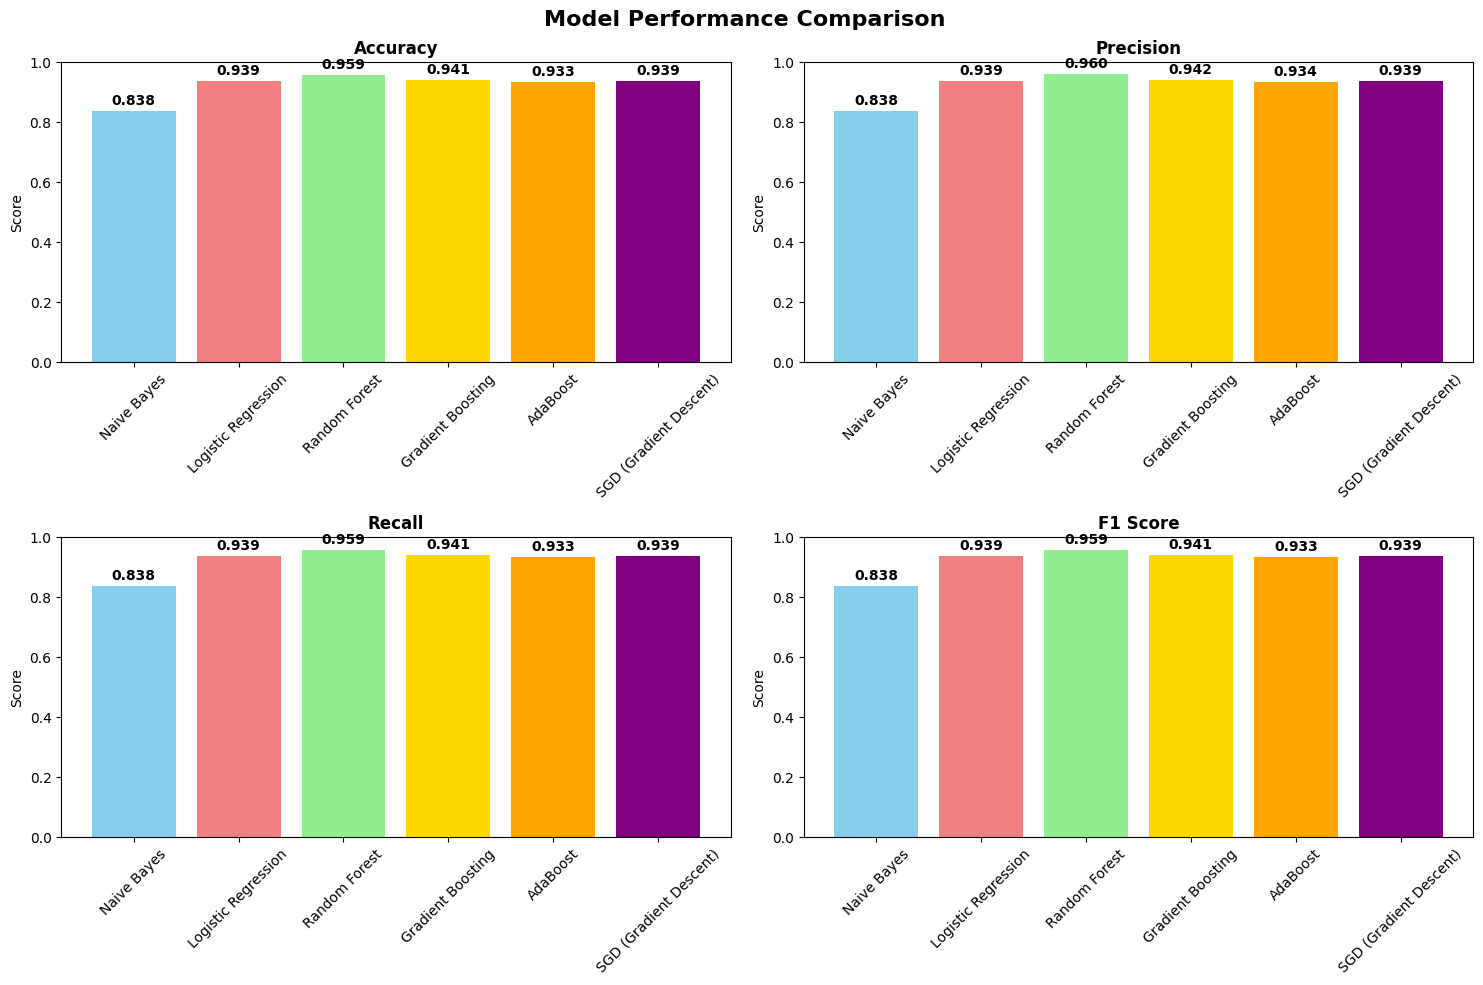

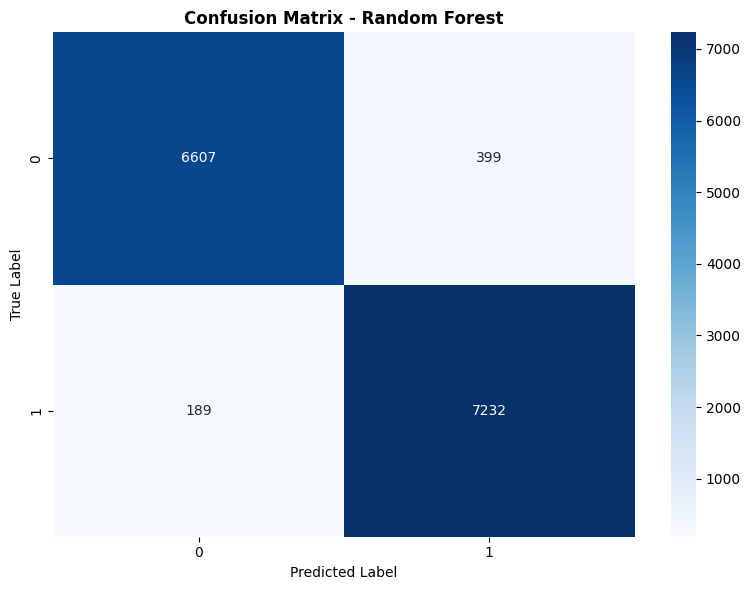


Model package saved as: best_model_random_forest.pkl
Package includes: model, vectorizer, and performance metrics

Training completed! All models have been trained and evaluated.
Best performing model: Random Forest
Use predict_new_text('your text') to make predictions on new data.


In [10]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)
print(comparison_df)

# Find best model
best_model_name = comparison_df['f1_score'].idxmax()
print(f"\nBest Model (by F1 Score): {best_model_name}")
print(f"F1 Score: {comparison_df.loc[best_model_name, 'f1_score']:.4f}")

# Detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}")
best_predictions = results[best_model_name]['predictions']
print(classification_report(y_test, best_predictions))

# Create performance comparison visualization
def plot_model_performance():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange', 'purple']

    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]

        model_names = list(results.keys())
        values = [results[model][metric] for model in model_names]

        bars = ax.bar(model_names, values, color=colors[:len(model_names)])
        ax.set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
        ax.set_ylabel('Score')
        ax.set_ylim(0, 1)


        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

        # Rotate x-axis labels
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


plot_model_performance()


def plot_best_model_confusion_matrix():
    plt.figure(figsize=(8, 6))

    best_predictions = results[best_model_name]['predictions']
    cm = confusion_matrix(y_test, best_predictions)

    labels = sorted(y_test.unique())

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

plot_best_model_confusion_matrix()


def save_best_model():
    filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'


    model_package = {
        'model': trained_models[best_model_name],
        'vectorizer': vectorizer,
        'model_name': best_model_name,
        'performance': results[best_model_name]
    }

    with open(filename, 'wb') as f:
        pickle.dump(model_package, f)

    print(f"\nModel package saved as: {filename}")
    print("Package includes: model, vectorizer, and performance metrics")

save_best_model()

# Function to make predictions on new text
def predict_new_text(text, model_name=None):
    """Make predictions on new text data"""
    if model_name is None:
        model_name = best_model_name

    cleaned_text = clean_text(text)

    text_tfidf = vectorizer.transform([cleaned_text])

    model = trained_models[model_name]
    prediction = model.predict(text_tfidf)[0]

    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(text_tfidf)[0]
        max_prob = np.max(probabilities)
        print(f"Prediction: {prediction} (Confidence: {max_prob:.3f})")
    else:
        print(f"Prediction: {prediction}")

    return prediction



print("\nTraining completed! All models have been trained and evaluated.")
print(f"Best performing model: {best_model_name}")
print(f"Use predict_new_text('your text') to make predictions on new data.")

This code section implements Exploratory Data Analysis (EDA) for our text classification dataset by first creating a count plot using sns.countplot(data=read, x="label", palette="Set2") to visualize the distribution of Real vs Fake news labels with custom tick labels for better interpretation, which is essential for understanding class balance and potential bias in your dataset. The code then performs feature engineering by creating a new column read["text_len"] = read["content"].apply(lambda x: len(x.split())) that calculates word count for each text sample, followed by a histogram visualization sns.histplot(read, x="text_len", hue="label", bins=50, kde=True, palette="Set1") that shows the distribution of text lengths for both classes with kernel density estimation overlay to identify patterns in how real and fake news differ in terms of content length. Finally, a boxplot sns.boxplot(data=read, x="label", y="text_len", palette="Set3") provides statistical summary comparison showing median values, quartiles, and outliers for text length between the two categories, which helps identify systematic differences that could serve as distinguishing features and informs whether text length should be included as an additional feature alongside TF-IDF vectorized content for improved model performance.

Logistic Regression Results
Accuracy: 0.9508560338254661
F1 Score: 0.9524320697752432


/tmp/ipython-input-3487231749.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=read, x="label", palette="Set2")


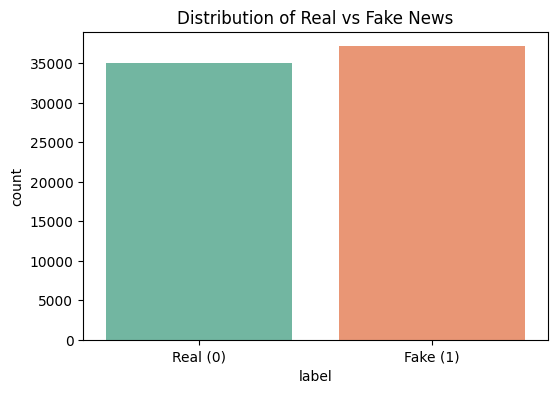

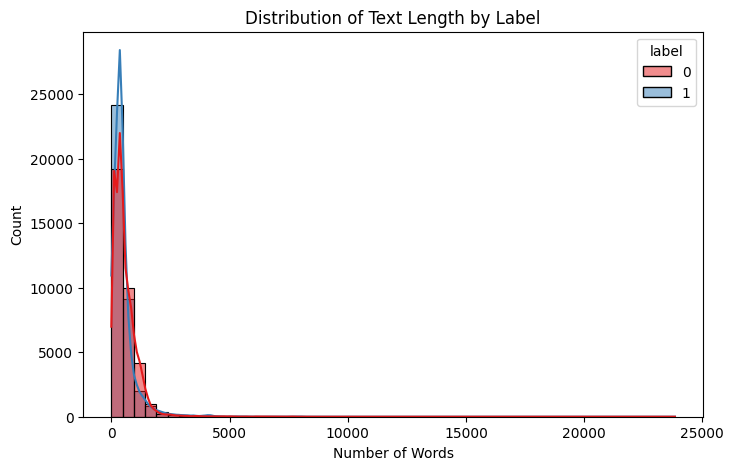

/tmp/ipython-input-3487231749.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=read, x="label", y="text_len", palette="Set3")


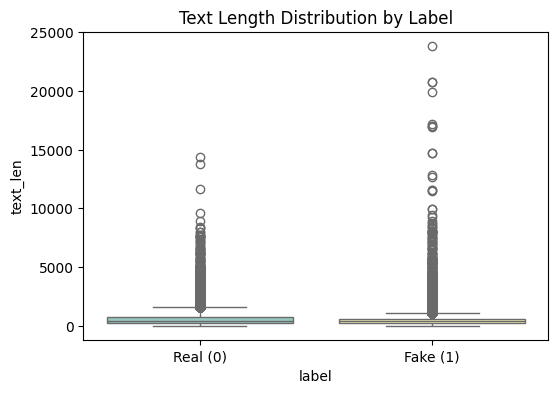

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=read, x="label", palette="Set2")
plt.xticks([0,1], ["Real (0)", "Fake (1)"])
plt.title("Distribution of Real vs Fake News")
plt.show()


read["text_len"] = read["content"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(read, x="text_len", hue="label", bins=50, kde=True, palette="Set1")
plt.title("Distribution of Text Length by Label")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(data=read, x="label", y="text_len", palette="Set3")
plt.xticks([0,1], ["Real (0)", "Fake (1)"])
plt.title("Text Length Distribution by Label")
plt.show()

